## Observations and Insights

In [215]:
# 1. The number of data points for each Drug Regimen were all above 100 making the sample size statistically significant. 
#   (assuming 10 samples per variable is a good measure of sample size)

# 2. The study had a near identical distribution of the number of male and female mice.
#   It would be interesting to see if there is a corellation between sex of the mouse with efficacy.

# 3. Based on average final tumor volume both Capomulin and Ramicane appeared to be equally effective.
#    However, the starting tumor volumes were not equivalent, so we may need to study the "Change in tumor volume" more closely.

# 4. Infubinol was the only treatment with one outlier - the data for other treatments was good.

# 5. An r-value of 0.84, shows a strong positive coorelation between weight and tumor volume for the Capomulin
#    treatment. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight 
#    would skew the interpretation of efficacy.

## Dependencies and starter code

In [216]:
# Dependencies and Setup

# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [217]:
# Define input file paths
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [218]:
# Read the mouse data from first input file
mouse_metadata = pd.read_csv(mouse_metadata)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [219]:
# Read the study results from second input file 
study_results = pd.read_csv(study_results)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [221]:
# Combine the mouse data and the trial results into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='inner')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [222]:
# Check for errors and misisng data in the merged file 
clean_merged_df = merged_df.dropna(how='any')
clean_merged_df.head()

# There are no Null data as number of rows in clean_merged_df is same as those in merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [223]:
# Number of mice
mouse_count = merged_df["Mouse ID"].nunique()
mouse_count

249

In [224]:
# Find the number of unique mice in each drug regimen - total mice = 249
mouse_per_drug_regimen = merged_df.groupby("Drug Regimen")["Mouse ID"].nunique()
mouse_per_drug_regimen # Note that Stelasyn used only 24 mice  

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [225]:
# Check how many timepoints each mouse has  
treatment_per_mouse = merged_df["Mouse ID"].value_counts().sort_values(ascending=False)
treatment_per_mouse.head()
# Each mouse has 10 datapoints- except g989

g989    13
b559    10
b742    10
l661    10
l733    10
Name: Mouse ID, dtype: int64

In [226]:
# Mouse ID g989 is showing 13 entries - so we may need to "clean" that data by deleting that mouse
# Find the datapoints for mouse g989
check_df = merged_df.set_index("Mouse ID") # Set Mouse ID as index
check_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [227]:
# Find mouse g989
mouse_g989 = check_df.loc["g989", :]
mouse_g989 
# Mouse g989 has inaccurate / multiple values for various timepoints -total of 13 entries
# We will have to delete this mouse from the study.

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [228]:
# Delete the mouse g989 from the original merged dataframe
cleaned_df = check_df.drop(index = 'g989')
cleaned_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [229]:
# Reset index of cleaned dataframe
cleaned_df = cleaned_df.reset_index()

# 248 mice with 10 datapoints each should be 2480 - but we have 1880 rows which indicates that 
# some mice do not have all 10 datapoints - maybe they die sooner?
# cleaned_df = cleaned_df.drop(columns="index", "level_0") # used this to delete columns added during index reset
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [230]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Number of datapoints per treatment are the timepoints for all mice in the treatment
timepoints_per_drug = cleaned_df.groupby("Drug Regimen")["Timepoint"].count()

# Calculate Mean of Tumor Volume by Regimen
mean_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate Median of Tumor Volume by Regimen
median_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance of Tumor Volume by Regimen
var_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate standard deviation of Tumor Volume by Regimen
std_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate SEM of Tumor Volume by Regimen
sem_tumor_vol_by_drug = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Create the summary statistics DataFrame of Tumor Volume by Regimen
tumor_vol_sum_stats_df = pd.DataFrame({"Trial Count": timepoints_per_drug,
                                       "Mean": mean_tumor_vol_by_drug,
                                      "Median": median_tumor_vol_by_drug,
                                      "Variance": var_tumor_vol_by_drug,
                                      "Standard deviation": std_tumor_vol_by_drug,
                                      "SEM": sem_tumor_vol_by_drug
                                      })

# Display the summary statistics for Tumor Volume by Regimen
tumor_vol_sum_stats_df

,Trial Count,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Trial Count, dtype: int64


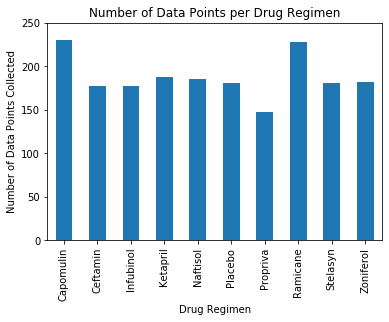

<Figure size 432x288 with 0 Axes>

In [231]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints = tumor_vol_sum_stats_df["Trial Count"]
print(datapoints)

# Define dataframe variables to be plotted
datapoints.plot(kind='bar')

# Define plot options
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points Collected")
plt.ylim(0,250)

# Save bar plot 
plt.savefig("Images/PandasBar.png") 

# Display plot
plt.show()
plt.tight_layout()


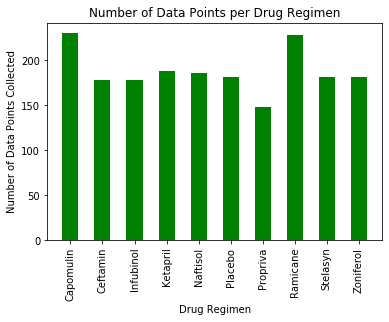

In [232]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Define variables to be plotted
xaxis = np.arange(len(datapoints))
tick_locations = xaxis.copy()

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Define plot options
plt.xticks(tick_locations)
plt.title("Number of Data Points per Drug Regimen")
plt.ylabel("Number of Data Points Collected")
plt.xlabel("Drug Regimen")

# Generate bar plot
plt.bar(xaxis, datapoints, color='green', align='center', width = .5)

# Save bar plot 
plt.savefig("Images/PyplotBar.png")

# Show bar plot 
plt.show()

## Pie plots

In [233]:
# Identify the number of female and male mice in the study 
# Group the mice by "Sex" and count the unique mice by "Mouse ID"
mouse_count_by_sex = cleaned_df.groupby("Sex")["Mouse ID"].nunique()
mouse_count_by_sex

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

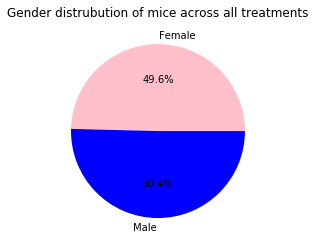

In [234]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Define plot options
colors = ("Pink", "Blue")
plt.title("Gender distrubution of mice across all treatments")
plt.axis("off") # remove the axis labels

# Generate Pandas Pie plot
mouse_count_by_sex.plot(kind='pie', autopct='%1.1f%%', colors=colors, subplots=True, figsize=(5, 5)) 

# Save Pandas Pie plot
plt.savefig("Images/PandasPie.png")

# Display Pandas Pie plot
plt.show()

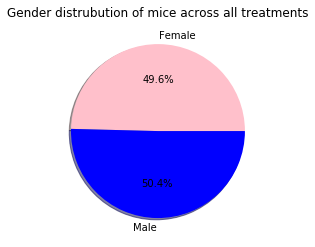

In [235]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define plot options
labels=("Female", "Male")
colors = ("Pink", "Blue")
plt.title("Gender distrubution of mice across all treatments")

# Generate Pyplot Pie plot
plt.pie(mouse_count_by_sex, colors=colors, labels=labels,autopct="%1.1f%%", shadow=True)

# Save Pyplot Pie plot
plt.savefig("Images/PyplotPie.png")

# Display Pyplot Pie plot
plt.show()

## Quartiles, outliers and boxplots

In [236]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# CAPOMULIN DATA COLLECTION 
# Create sub-set for the drug regimen
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

# Find the last data point in the treatment  
cap_final = cap_df.groupby('Mouse ID')['Timepoint'].max()

# Create dataframe with last timepoint values
cap_final_df = pd.DataFrame(cap_final)

# Merge the dataframe with the original dataframe to get the corresponding values for the rest of the columns
cap_all = pd.merge(cap_final_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
cap_all

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [237]:
# Capomulin Quartile Analysis
cap_counts = cap_all["Mouse ID"].count()
cap_tumors = cap_all["Tumor Volume (mm3)"]

cap_quartiles = cap_tumors.quantile([.25,.5,.75])
cap_lowerq = round(cap_quartiles[0.25],2)
cap_median = round(cap_quartiles[0.5],2)
cap_upperq = round(cap_quartiles[0.75],2)
cap_iqr = round(cap_upperq-cap_lowerq,2)

cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr),2)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr),2)

# Create a dataframe to store all quartiles
cap_quartiles = [{"Drug Regimen": "Capomulin",
                  "Counts": cap_counts,
                  "Q1": cap_lowerq,
                  "Median": cap_median,
                  "Q3": cap_upperq,
                  "IQR": cap_iqr,
                  "Outliers Below": cap_lower_bound,
                  "Outliers Above": cap_upper_bound}]
cap_quartiles_df = pd.DataFrame(cap_quartiles)

print("*********** CAPOMULIN QUARTILE ANALYSIS **********")
cap_quartiles_df

*********** CAPOMULIN QUARTILE ANALYSIS **********


,Drug Regimen,Counts,Q1,Median,Q3,IQR,Outliers Below,Outliers Above
0,Capomulin,25,32.38,38.13,40.16,7.78,20.71,51.83


In [238]:
# RAMICANE DATA COLLECTION
# Create sub-set for the drug regimen
ram_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]

# Find the last data point in each treatment  
ram_final = ram_df.groupby('Mouse ID')['Timepoint'].max()

# Create dataframe with last timepoint values
ram_final_df = pd.DataFrame(ram_final)

# Merge the dataframe with the original dataframe to get the corresponding values for the rest of the columns
ram_all = pd.merge(ram_final_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
ram_all

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [239]:
# Ramicane Quartile Analysis
ram_counts = ram_all["Mouse ID"].count()
ram_tumors = ram_all["Tumor Volume (mm3)"]

ram_quartiles = ram_tumors.quantile([.25,.5,.75])
ram_lowerq = round(ram_quartiles[0.25],2)
ram_median = round(ram_quartiles[0.5],2)
ram_upperq = round(ram_quartiles[0.75],2)
ram_iqr = round(ram_upperq-ram_lowerq,2)

ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr),2)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr),2)

# Create a dataframe to store all quartiles
ram_quartiles = [{"Drug Regimen": "Ramicane",
                  "Counts": ram_counts,
                  "Q1": ram_lowerq,
                 "Median": ram_median,
                  "Q3": ram_upperq,
                 "IQR": ram_iqr,
                 "Outliers Below": ram_lower_bound,
                 "Outliers Above": ram_upper_bound}]
ram_quartiles_df = pd.DataFrame(ram_quartiles)
print("********** RAMICANE QUARTILE ANALYSIS**********")
ram_quartiles_df

********** RAMICANE QUARTILE ANALYSIS**********


,Drug Regimen,Counts,Q1,Median,Q3,IQR,Outliers Below,Outliers Above
0,Ramicane,25,31.56,36.56,40.66,9.1,17.91,54.31


In [240]:
# INFUBINOL DATA COLLECTION 
# Create sub-set for the drug regimen
inf_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol",:]

# Find the last data point in the treatment  
inf_final = inf_df.groupby('Mouse ID')['Timepoint'].max()

# Create dataframe with last timepoint values
inf_final_df = pd.DataFrame(inf_final)

# Merge the dataframe with the original dataframe to get the corresponding values for the rest of the columns
inf_all = pd.merge(inf_final_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
inf_all

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [241]:
# Infubinol Quartile Analysis
inf_counts = inf_all["Mouse ID"].count()
inf_tumors = inf_all["Tumor Volume (mm3)"]

inf_quartiles = inf_tumors.quantile([.25,.5,.75])
inf_lowerq = round(inf_quartiles[0.25],2)
inf_median = round(inf_quartiles[0.5],2)
inf_upperq = round(inf_quartiles[0.75],2)
inf_iqr = round(inf_upperq-inf_lowerq,2)

inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr),2)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr),2)

# Create a dataframe to store all quartiles
inf_quartiles = [{"Drug Regimen": "Infubinol",
                  "Counts": inf_counts,
                  "Q1": inf_lowerq,
                  "Median" : inf_median,
                  "Q3": inf_upperq,
                  "IQR": inf_iqr,
                  "Outliers Below": inf_lower_bound,
                  "Outliers Above": inf_upper_bound}]
inf_quartiles_df = pd.DataFrame(inf_quartiles)
print("********** INFUBINOL QUARTILE ANALYSIS**********")
inf_quartiles_df

********** INFUBINOL QUARTILE ANALYSIS**********


,Drug Regimen,Counts,Q1,Median,Q3,IQR,Outliers Below,Outliers Above
0,Infubinol,25,54.05,60.17,65.53,11.48,36.83,82.75


In [242]:
# CEFTAMIN DATA COLLECTION 
# Create sub-set for the drug regimen
cef_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin",:]

# Find the last data point in the treatment  
cef_final = cef_df.groupby('Mouse ID')['Timepoint'].max()

# Create dataframe with last timepoint values
cef_final_df = pd.DataFrame(cef_final)

# Merge the dataframe with the original dataframe to get the corresponding values for the rest of the columns
cef_all = pd.merge(cef_final_df, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
cef_all

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [243]:
# Ceftamin Quartile Analysis
cef_counts = cef_all["Mouse ID"].count()
cef_tumors = cef_all["Tumor Volume (mm3)"]

cef_quartiles = cef_tumors.quantile([.25,.5,.75])
cef_lowerq = round(cef_quartiles[0.25],2)
cef_upperq = round(cef_quartiles[0.75],2)
cef_iqr = round(cef_upperq-cef_lowerq,2)
cef_median = round(cef_quartiles[0.5],2)
cef_lower_bound = round(cef_lowerq - (1.5*cef_iqr),2)
cef_upper_bound = round(cef_upperq + (1.5*cef_iqr),2)

# Create a dataframe to store all quartiles
cef_quartiles = [{"Drug Regimen": "Ceftamin",
                  "Counts": cef_counts,
                  "Q1": cef_lowerq,
                  "Median": cef_median,
                  "Q3": cef_upperq,
                  "IQR": cef_iqr,
                  "Outliers Below": cef_lower_bound,
                  "Outliers Above": cef_upper_bound}]
cef_quartiles_df = pd.DataFrame(cef_quartiles)
print("********** CEFTAMIN QUARTILE ANALYSIS**********")
cef_quartiles_df

********** CEFTAMIN QUARTILE ANALYSIS**********


,Drug Regimen,Counts,Q1,Median,Q3,IQR,Outliers Below,Outliers Above
0,Ceftamin,25,48.72,59.85,64.3,15.58,25.35,87.67


In [244]:
# Capomulin Outliers
cap_outliers = cap_tumors.loc[(cap_all["Tumor Volume (mm3)"] < cap_lower_bound)|
                              (cap_all["Tumor Volume (mm3)"] > cap_upper_bound)]
print(f"Capomulin Outliers:")
cap_outliers

Capomulin Outliers:


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [245]:
# Ramicane Outliers
ram_outliers = ram_tumors.loc[(ram_all["Tumor Volume (mm3)"] < ram_lower_bound)|
                              (ram_all["Tumor Volume (mm3)"] > ram_upper_bound)]
print(f"Ramicane Outliers:")
ram_outliers

Ramicane Outliers:


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [246]:
# Infubinol Outliers
inf_outliers = inf_tumors.loc[(inf_all["Tumor Volume (mm3)"] < inf_lower_bound)|
                              (inf_all["Tumor Volume (mm3)"] > inf_upper_bound)]
print(f"Infubinol Outliers:")
inf_outliers

Infubinol Outliers:


5    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [247]:
# Ceftamin Outliers
cef_outliers = cef_tumors.loc[(cef_all["Tumor Volume (mm3)"] < cef_lower_bound)|
                              (cef_all["Tumor Volume (mm3)"] > cef_upper_bound)]
print(f"Ceftamin Outliers:")
cef_outliers

Ceftamin Outliers:


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [248]:
# Based on the quantitative analysis above, there is one outlier for final tumor volume in the Infubinol treatment.

In [249]:
# Combining all quartiles into one dataframe for easy visualization
all_quartiles_df = cap_quartiles_df.append(ram_quartiles_df)
all_quartiles_df = all_quartiles_df.append(inf_quartiles_df)
all_quartiles_df = all_quartiles_df.append(cef_quartiles_df)
all_quartiles_df

,Drug Regimen,Counts,Q1,Median,Q3,IQR,Outliers Below,Outliers Above
0,Capomulin,25,32.38,38.13,40.16,7.78,20.71,51.83
0,Ramicane,25,31.56,36.56,40.66,9.10,17.91,54.31
0,Infubinol,25,54.05,60.17,65.53,11.48,36.83,82.75
0,Ceftamin,25,48.72,59.85,64.30,15.58,25.35,87.67


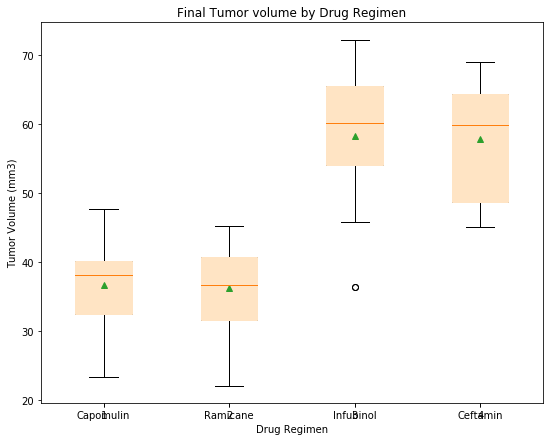

In [250]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Identify data to plot 
data_to_plot = [cap_tumors, ram_tumors, inf_tumors, cef_tumors]

# Define Plot Options
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.set_title("Final Tumor volume by Drug Regimen")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

bp = ax1.boxplot(data_to_plot, labels=labels, patch_artist=True, showmeans=True)

# Change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    box.set(color ='bisque', linewidth = 1)

# Generate the Combined Box and whisker plot using the same y-axis for all plots
ax1.boxplot(data_to_plot)

# Save the Combined Box and Whisker plot
plt.savefig("Images/CombinedBoxplot.png")

# Display the Combined Box and Whisker plot
plt.show()

In [251]:
# Based on combine Box plot above, there is one outlier for final tumor volume in the Infubinol treatment.

## Line and scatter plots

In [252]:
# Generate a line plot of timepoint versus tumor volume for a mouse treated with Capomulin (select one s185, i557, r157)

#Take use input for which mouse to select (giving 3 options)
mouse_id = input("Select a Capomulin treated mouse(s185 or i557 or r157):  ")

# Filter original data for just that mouse ID
capomulin_mouse_df = cleaned_df.loc[(cleaned_df["Mouse ID"] == mouse_id),:]
capomulin_mouse_df

Select a Capomulin treated mouse(s185 or i557 or r157):  s185


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


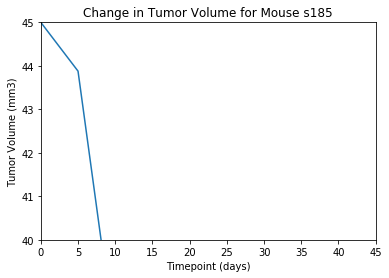

In [253]:
# Generate a line plot of timepoint versus tumor volume for the selected mouse treated with Capomulin
# Set variables to hold relevant data
timepoint = capomulin_mouse_df["Timepoint"]
tumor_volume = capomulin_mouse_df["Tumor Volume (mm3)"]

# Define plot options
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Change in Tumor Volume for Mouse {mouse_id}")
plt.xlim(0, timepoint.max())
plt.ylim(40, capomulin_mouse_df["Tumor Volume (mm3)"].max())

# Generate the line plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Save the line plot
plt.savefig(f"Images/Line plot for Mouse {mouse_id}.png")

# Display the line chart
plt.show()

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1439     r157    Capomulin    Male          22          25          0   
1440     r157    Capomulin    Male          22          25          5   
1441     r157    Capomulin    Male          22          25         10   
1442     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

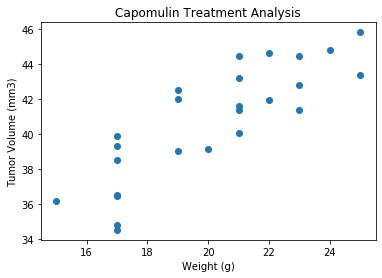

In [254]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter original data for Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
print(capomulin_df)

# Define x and y values
avg_mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Define plot options
plt.title("Capomulin Treatment Analysis")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Generate the scatter plot 
plt.scatter(avg_mouse_weight,avg_tumor_volume)

# Save the scatter plot
plt.savefig("Images/Scatter.png")

# Display the scatter plot
plt.show()

********************* CAPOMULIN - CORRELATION BETWEEN MOUSE WEIGHT AND TUMOR VOLUME****************


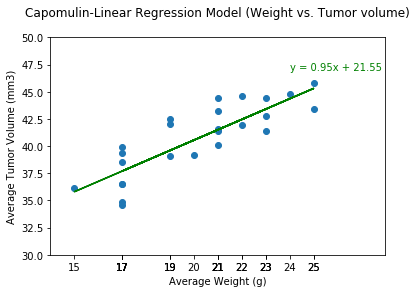

p-value = 0.0
Pearsons Correlation Coefficient = 0.84
Slope of the line = 0.95
Equation of the line is y = 0.95x + 21.55



In [255]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
print (f"********************* CAPOMULIN - CORRELATION BETWEEN MOUSE WEIGHT AND TUMOR VOLUME****************")

# Identify x and y values - Mean weight vs. Mean Tumor Volume for the Capomulin regimen
avg_mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
avg_tumor_volume = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression mouse weight and avg tumor volume
slope, intercept, r, p, std_err = st.linregress(avg_mouse_weight, avg_tumor_volume)
slope = round(slope,2)
intercept = round(intercept, 2)
r = round(r, 2)
p = round(p, 2)

# Create equation of line to calculate predicted avg tumor volume
yvalue = slope * avg_mouse_weight + intercept
line_equation = "y = " + str(slope) + "x + "+ str(intercept)

# Define plot options
plt.title("Capomulin-Linear Regression Model (Weight vs. Tumor volume)\n")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlim(14,28)
plt.ylim(30,50)
plt.xticks(avg_mouse_weight)

# Plot the linear model on top of scatter plot 
plt.scatter(avg_mouse_weight,avg_tumor_volume)

# Generate the line plot
plt.plot(avg_mouse_weight,yvalue,"-", color='g')
plt.annotate(line_equation, (24, 47), fontsize=10, color='g')

# Save the scatter plot
plt.savefig("Images/LinearRegression.png")

# Display the plot
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(avg_mouse_weight,avg_tumor_volume)[0],2)

# Print all the values: 
print(f"p-value = {p}")
print(f'Pearsons Correlation Coefficient = {corr}')
print(f"Slope of the line = {slope}")
print(f"Equation of the line is {line_equation}\n") 
